In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from Dataset import Dataset
from models import Models
import torch.multiprocessing as mp



In [2]:
mp.set_start_method('spawn')


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_dataset = Dataset(is_validation=True, device=device)

batch_size = 32
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [18]:
device = torch.device("cuda:0")


In [19]:
device

device(type='cuda', index=0)

In [20]:
model_choice = 'resnet50'  
num_classes = 2  
dropout = 0  
model = Models(model_choice, num_out_classes=num_classes, dropout=dropout)


model.to(device)
model.eval()

Models(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)

In [7]:
# Set hyperparameters
num_epochs = 10
learning_rate = 0.001


# Load the ImageNet Object Localization Challenge dataset
train_dataset = Dataset(is_validation=False, device=device)

#train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


In [15]:
print(len(train_dataset.data))
print(len(test_dataset.data))

49061
6075


In [21]:

# Parallelize training across multiple GPUs
model = torch.nn.DataParallel(model)

# Set the model to run on the device
model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model...
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Move input and label tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero out the optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()
        
        print(loss.item(), end=", ")
    # Print the loss for every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print(f'Finished Training, Loss: {loss.item():.4f}')

0.7478691935539246, 6.591403961181641, 1.0360265970230103, 2.9127304553985596, 0.8158989548683167, 1.693673849105835, 1.7318371534347534, 0.9373751878738403, 0.7353278398513794, 0.870458722114563, 0.8801357746124268, 0.6933585405349731, 0.8027746081352234, 0.6617155075073242, 0.7062457799911499, 0.6992577314376831, 0.7026487588882446, 0.6915061473846436, 0.6727129220962524, 0.7402521967887878, 0.7270499467849731, 0.7062258720397949, 0.6697432398796082, 0.7200413346290588, 0.707392156124115, 0.6934889554977417, 0.7192595601081848, 0.6873965859413147, 0.7062301635742188, 0.6941046118736267, 0.6943896412849426, 0.6956613659858704, 0.6981212496757507, 0.6932095289230347, 0.6904551982879639, 0.6766002178192139, 0.7265630960464478, 0.7019106149673462, 0.6786338090896606, 0.7192745208740234, 0.7057056427001953, 0.6963255405426025, 0.6947859525680542, 0.6946403384208679, 0.6944207549095154, 0.6948406100273132, 0.6934067606925964, 0.6958631277084351, 0.6939678192138672, 0.6837064027786255, 0.66

In [ ]:
criterion = nn.CrossEntropyLoss()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        #print(outputs.data.shape)
        #print(labels.shape)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        #print(_.shape)
        #print(predicted.shape)
        total += labels.size(0)
        correct += (predicted == labels[:, 0]).sum().item()

# Calculate average loss and accuracy
average_loss = test_loss / len(test_dataloader)
accuracy = correct / total * 100

print(f"Average Loss: {average_loss:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

Average Loss: nan
Accuracy: 50.00%


In [ ]:
torch.max(outputs, 1)#.data

torch.return_types.max(
values=tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       device='cuda:0'),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


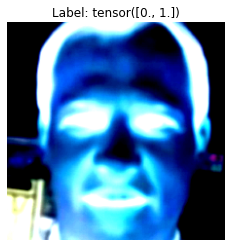

tensor([0., 1.])


In [ ]:
image, label = test_dataset[0]
image_np = image.permute(1, 2, 0).numpy()

# Display the image
plt.imshow(image_np)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()
print(label)        # Label value

In [ ]:
from glob import glob
folder = f"{'val'}"
fake_imgs = [f'FakeManipulation-{i+1}/**/*.jpg' for i in range(5)]
fake_paths = [glob(f'{folder}/{img}', recursive=True) for img in fake_imgs]
real_imgs = [f'Real-{i+1}/**/*.jpg' for i in range(4)]
real_paths = [glob(f'{folder}/{img}', recursive=True) for img in real_imgs]

In [ ]:
fake_paths

[['val/FakeManipulation-1/00ac8e5540b1f010aab2f9d35e2312d1/269727cf49a0ed59ed7b72d0983b98b4/frame00011.jpg',
  'val/FakeManipulation-1/012e53a8c0f9eae352403d68512502d7/fec88085a585426cf646a7c61d36dc08/frame00027.jpg',
  'val/FakeManipulation-1/019f99a7d8c6d6d855d05ae8ee637ee2/f0399d344b4937c52474403b8cd79b5f/frame00017.jpg',
  'val/FakeManipulation-1/01b5e20b1b0e82c794f4982dd98dd944/dc53a7fdc76f46085780e34265a5a352/frame00008.jpg',
  'val/FakeManipulation-1/02191903795778019344f5761db3e92a/78677591e7dc535067bee97c984ac95c/frame00031.jpg',
  'val/FakeManipulation-1/029333c779351e4039e87275a372044d/123b9afe84db50c3df40f64024c5c3a6/frame00014.jpg',
  'val/FakeManipulation-1/02a3531d58186487cb6ea30835a9cd26/1e8524adae2bb478d0b379929ec767a1/frame00029.jpg',
  'val/FakeManipulation-1/02d2d286a4efec4c2142774fa0f7daf4/bfa633526ee55a868f65d656d8ecd4fd/frame00005.jpg',
  'val/FakeManipulation-1/02f5a3a8502379814523d6284f550101/83d452ebab710418628c5b4d10a80fdf/frame00021.jpg',
  'val/FakeManipula